<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/Richard/Intro_to_error_reduction_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a one module notebook consisting of an introduction to sampling, interpreting, and optimizing machine learning models using 3 common loss functions: mean absolute percent error (MAPE), mean standard error (MSE), and Huber Loss. This module can be used as a corresponding resource for DSECOP 150: Introduction to Classification Algorithms

#Introduction to Error Reduction Techniques

Author: Richard Harry

Date Created: September 20th, 2023

Last Modified: November 30th, 2023



## Mean Absolute Percent Error

Forecasting is a common tool used by many sectors to project future events like demand and possible sales. The mean absolute percentage error, or MAPE, can be used to gauge how accurate a forecast is. By using this statistic, organizations may optimize resource allocation and budgetary decisions while also increasing the accuracy of their forecasts.

The accuracy of a forecasting approach is determined by a statistic called mean absolute percentage error, or MAPE. In order to determine how accurate the predicted quantities were in relation to the actual numbers, it represents the average of the absolute percentage errors of each entry in a dataset. MAPE necessitates the usage of dataset values other than zero and is frequently useful for large-scale data analysis.

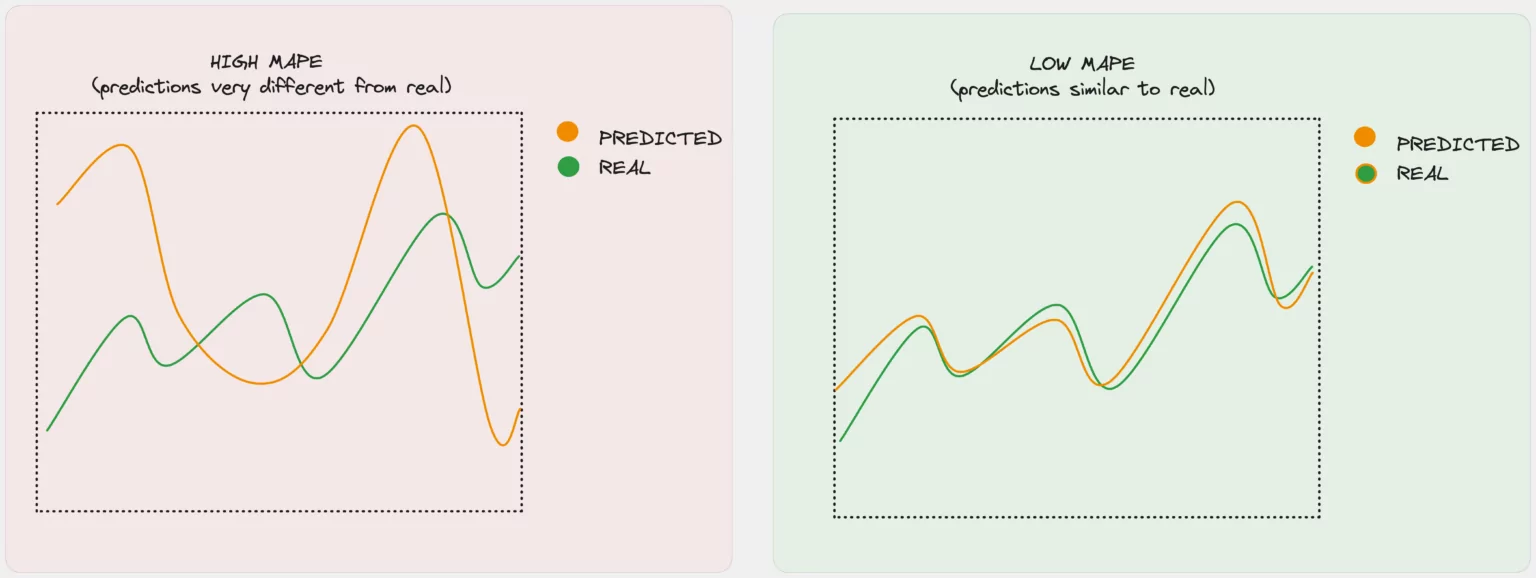

**Image**: High vs. Low MAPE prediction models, and their comparison to real time data forecasting.

Percentage errors are calculated in terms of absolute errors, without regards to sign. This avoids the problem of positive and negative errors canceling each other out.

$$MAPE = \frac{1}{n}∑⃒\frac{A_t-F_t}{A_t}\vert $$

Where:

$n$ is the number of fitted points,

$A_t$ is the actual value,

$F_t$ is the forecasted value.

∑ is summation notation (the absolute value is summed for every forecasted point in time).

##Mean Squared Error

Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. When a model has no error, the MSE equals zero. As model error increases, its value increases. The mean squared error is also known as the mean squared deviation (MSD).

$$MSE = \frac {∑(y_i - \hat{y_i})^2}{n}$$

*Where:*

$y_i$ is the ith observed value,
$\hat{y_i}$ is the corresponding predicted value, and
$n$ is the number of observations.

Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function. It is formally applied to regression functions, as a risk function corresponding to the expected value of the squared error loss.

Reg_Line.avif

**Figure**: Regression trendline with error points denoted with respect to the data set line fitting. Source: https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error

## Root Mean Square Error (RMSE)



The standard deviation of the residuals, or prediction errors, is known as the root mean square error, or RMSE. The distance between the data points and the regression line is measured by residuals, and the spread of these residuals is measured by RMSE. Put otherwise, it indicates the degree to which the data is centered around the line of best fit. In climatology, forecasting, and regression analysis, root mean square error is frequently used to validate experimental results. It can also be referred to as
the root mean squared deviation (RSMD). It can be defined as:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

$Where:$

- $RMSE$ is the Root Mean Square Error.
- $n$ is the number of observations or data points.
- $y_i$ is the actual value for the ith observation.
- $\hat{y}_i$ is the predicted value for the ith observation.
- The summation term $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ computes the squared differences between actual and predicted values.
- $\sqrt{}$ denotes the square root of the expression.




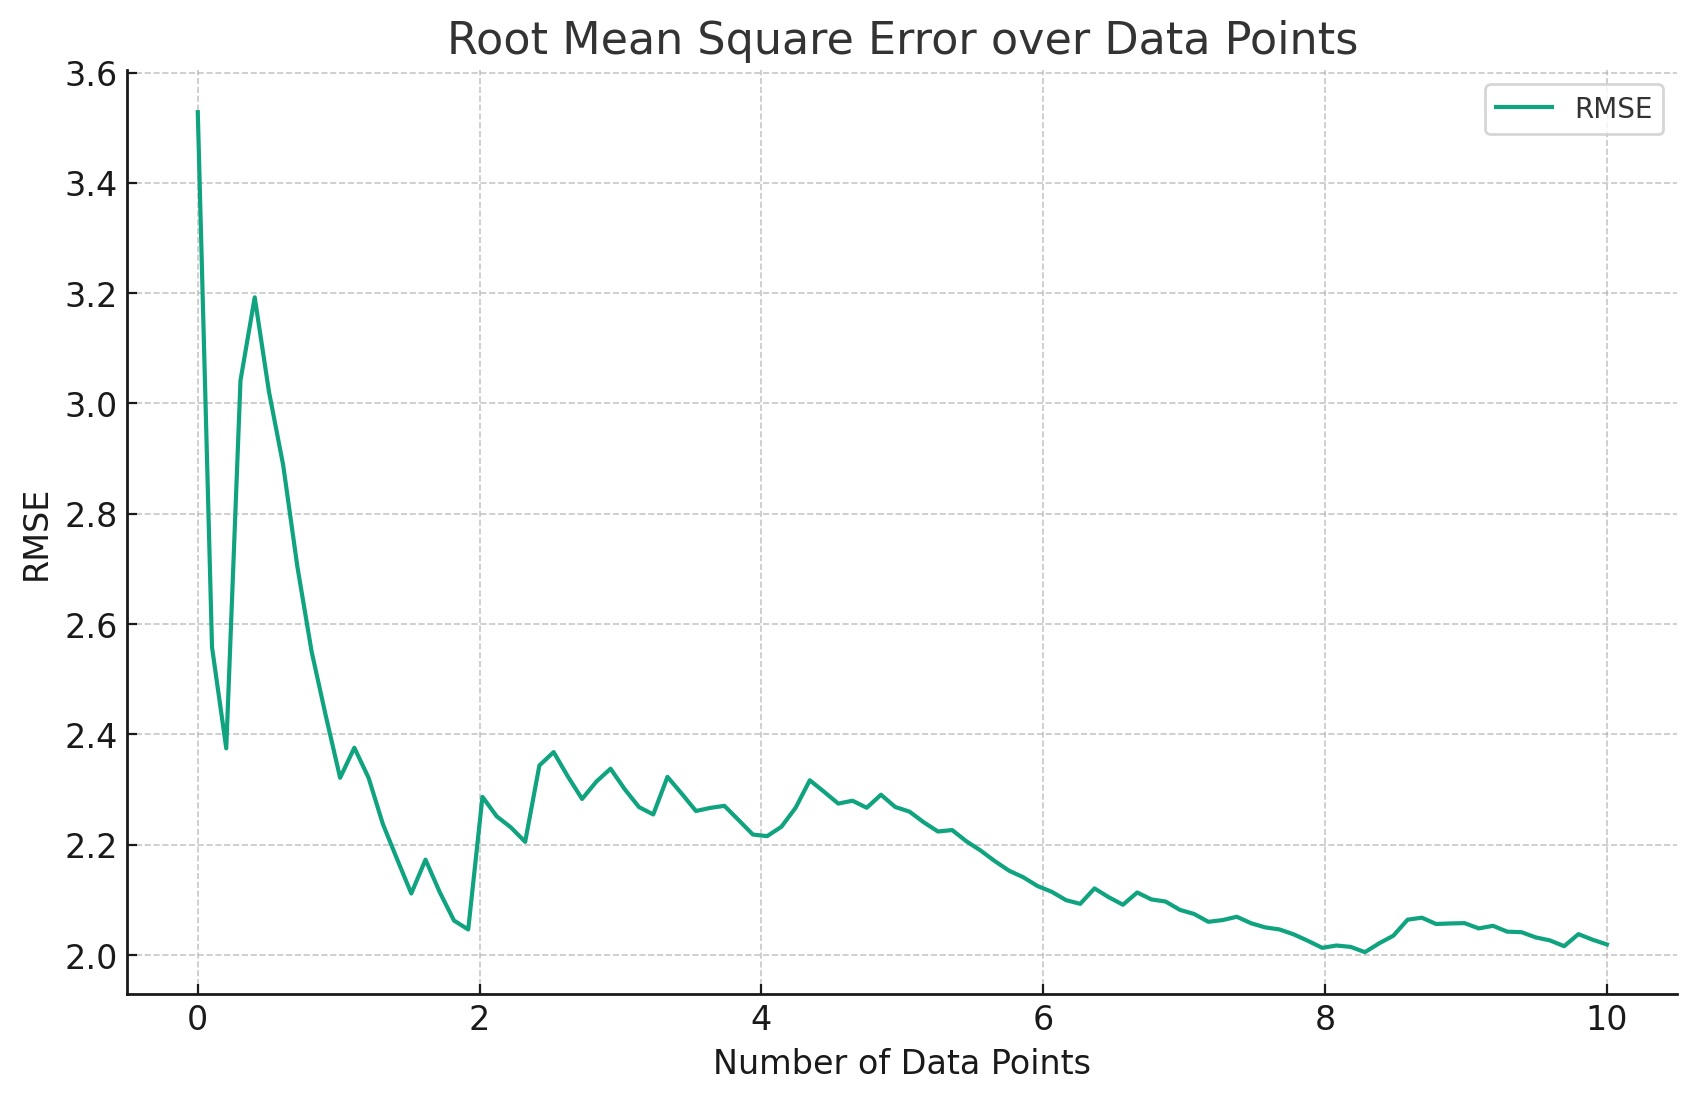

***Figure:*** *Simple illustration of arbitrary data points, with their root mean square error plotted as a function of them.*

The graph shows the Root Mean Square Error (RMSE) over the number of data points. In this figure on can determine that:

- The actual values were generated based on a linear function.
- The predicted values had some random noise added to them.
- The RMSE was calculated for an increasing number of data points.

As you can see in the graph, the RMSE varies as more data points are considered. This kind of visualization can be particularly useful for understanding how the error of a predictive model changes with different subsets of the data.

## Huber Loss Function ##

Huber Loss is a popular loss function used in machine learning for regression tasks, particularly when dealing with outliers in the data. It combines the properties of both quadratic loss (squared error) and absolute loss (absolute error) to provide a more robust solution. The key feature of Huber Loss is its ability to transition smoothly between quadratic and absolute loss functions, controlled by a parameter that needs to be selected carefully. Huber Loss is formally modeled as:

$L_{\delta}(a) = \begin{cases}
\frac{1}{2}(a)^2 & \text{for } |a| \leq \delta, \\
\delta(|a| - \frac{1}{2}\delta) & \text{otherwise.}
\end{cases}$

In this equation,
 $L_{\delta}(a)$ represents the Huber loss for a prediction error
$a$, and $δ$ is a threshold parameter that defines the point where the loss function changes from $a$ quadratic to linear. For errors smaller than $δ$, the loss is quadratic, and for those larger, it becomes linear. This combination helps in reducing the sensitivity to outliers in data.


### Now let's introduce the dataset

#Dataset of Refractive Materials


Refractive Index (Index of Refraction) is a value calculated from the ratio of the speed of light in a vacuum to that in a second medium of greater density. The refractive index variable is most commonly symbolized by the letter n or n' in descriptive text and mathematical equations.

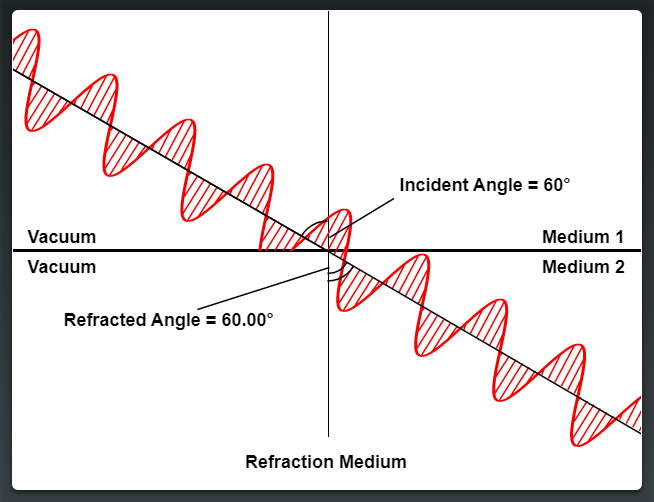

The formula of the refractive index is as follows:

$$ n = c/v$$

Where,

* n is the refractive index,

* c is the velocity of light in a vacuum ( 3 × 10^8 m/s),

* v is the velocity of light in a substance

The vacuum has a refractive index of 1. The refractive index of other materials can be calculated from the above equation. Higher the refractive index, the higher the optical density and slower is the speed of light. The table below lists the refractive index of different media.

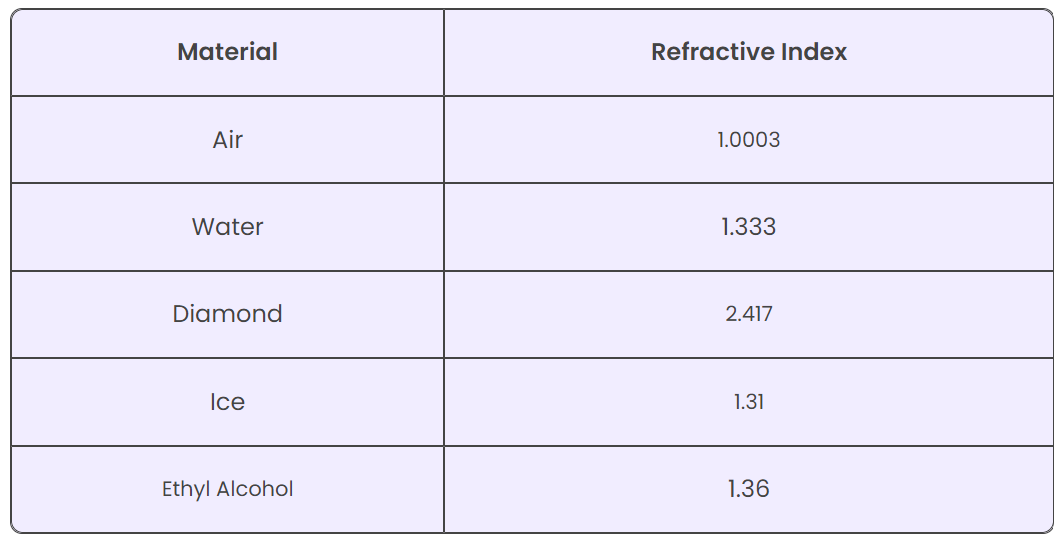

The data that we will be using is from the [University of California, Irvine](https://archive.ics.uci.edu/)'s machine learning database repository. It contains the extracted refractive index and corresponding wavelength for different glass types. Each glass type has a specific application that corresponds to a number on a scale from 1 to 7.

#Imports

In [ ]:
pip install ucimlrepo

Import Libraries: Begin by importing the necessary libraries. Typically, this includes NumPy for numerical operations, Pandas for data manipulation, and scikit-learn for implementing machine learning algorithms.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
import io
from google.colab import files


**Exercise 0:** Load the data that we will be using for the regression. This can be done by executing the cell below to link the data from the UCI repository. If the link is broken, it can be done using Pandas if the data is in a CSV file or any other supported format. It can be found under `glassdata.csv`



Now let's see if the data loaded correctly by saving the dataframe as `df`, then read the columns in `df` as the are: 'ID', 'refractive_index', 'Na', 'Mg' , 'Al' , 'Si', 'K', 'Ca', 'Ba', 'Fe', and 'glass_type'. Now print the table head using `df.head`

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['glassdata.csv'].decode('utf-8')))
df = df[['ID', 'refractive_index','Na', 'Mg', 'Al', 'Si','K','Ca','Ba','Fe','glass_type']]

df.head()

,ID,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Note: Element variables are unit measurements for weight percent in corresponding oxide

For better readability, let's name our `glassdata.csv` file `glassdata`. It should be read using pandas `pd.read_csv`.

In [ ]:
glassdata = pd.read_csv("glassdata.csv")

Now as before, go ahead and print the head of the table to make sure we renamed it correctly.

**Exercise 1:** On your own, convert all of the metal oxide columns into a combined variable so that we can plot them together versus the refractive index.

Note that for this specific classification problem, the classes are predetermined by the application of each glass. Note that float processing is a method for glass refinement that effects its usability and varies its application.

Types of Glass: Class Attributes

1 - Buiding Windows, float processed

2 - Building Windows, non float processed

3 - Vehicle Windows, float processed

4 - Vehicle Windows, non float processed

5 - Containers

6 - Tableware

7 - Headlamps

**Exercise 2:** Let's try plotting our `glass_type` classes on the x-axis, vs. the corresponding refractive index on the y-axis. Note that you will have to call from the seaborn library and begin with a scatter plot to compare the refractive indices to their classes.

**Exercise 3:** Divide the dataset into training and testing sets. This is crucial for evaluating the performance of your model on unseen data.

**Exercise 4:** Next, we must now initialize the linear regression model and fit it to the training data. This is where the model learns the relationship between the features and the target variable.

In this scenario we can now state our x and y variables as `glass_type` and `refractive_index`, respectively.

For our trendline in linear regression, we must fit our data points to a polynomial using `polyfit` from the `numpy` library. We are plotting 2 dimensional (x,y) data, so we must equivalate this fitting as the coefficients in the trendline equation. Next we will equate our `coefficients` variable to equal `slope` and `intercept`

**Exercise 5:** Now that we have performed our regression and determined our predicted variables, go ahead and try computing both the mean squared error and the mean absolute percent error. It can be done by first printing them as a function of (x,y), where x would be considered `y_test`, and y as `predictions`.

When the Mean Squared Error (MSE) and Mean Absolute Percent Error (MAPE) are greater than zero in the context of a regression model or any predictive model, it indicates that there is some level of error between the predicted values and the actual values.

Now we will compute the root mean squared error for our dataset. Let's make sure our test data size match our training data size. To do this, we will print the length of `y_test` and `y_train`.

In [ ]:
print(len(y_test), len(y_train))

54 160


It seems that our number of samples between `y_test` and `y_train are 54 and 160, respectively. In order to compute our RMSE, we must next align our training set with our test set by identifying the length of `y_train` with that of `y_test`.

In [ ]:
y_train_aligned = y_train[:len(y_test)]

In [ ]:
print(len(y_test), len(y_train_aligned))

54 54


Now let's compute the RMSE and print the output.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_train_aligned))
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 0.004615748003263379


**Exercise 6:** Now, let's reprint our graph, this time including the 'noise' of glass data, as a line graph instead of a scatter plot.

**Exercise 7:** Now, let's combine our plots with our noise along with our predictions to produce a complete estimation of our glass classes based on their refractive index, including our errors.

Lastly, let's compute the Huber loss.

Parameters:
- y_true: Array of true target values.
- y_pred: Array of predicted target values.
- delta: The threshold for switching between quadratic and linear loss.

Returns:
- Array of Huber loss values.

Assuming your CSV has columns 'y_true' and 'y_pred'Load your CSV dataset (replace 'your_dataset.csv' with your dataset file)

In [ ]:
def huber_loss(y, y_train, delta):
     loss = np.where(np.abs(y_true - y_pred) < delta,
                    0.5 * (y_true - y_pred)**2,
                    delta * np.abs(y_true - y_pred) - 0.5 * delta**2)


Compute the Huber loss.

Parameters:
- y_true: Array of true target values.
- y_pred: Array of predicted target values.
- delta: The threshold for switching between quadratic and linear loss.

Returns:
- Array of Huber loss values.
    


Assuming your CSV has columns 'y_true' and 'y_pred'

In [ ]:
y_true = y
y_pred = y_train

Set the value of delta for Huber loss

In [ ]:
delta = 1.0

**Exercise 8:** Calculate Huber loss for the entire dataset from our huber_loss function that includes `y_true`, `y_pred`, and `delta`.

**Exercise 9:** Awesome, we've made it this far! Now let's put all of our errors together and plot them togethe. Plot the Huber losses as a function of the data.

Noticed something interesting? Correct! With our dataset being 2-dimensional and there being no Huber loss, a plot would not be able to be compiled due to the continuos zero variable. Hopefully this notebook gives you an understanding of how important errors in machine learning are! They can modify our predictions, and produce noise in our datasets. For more supplementary resources, check out the links below. Happy Learning!

## Summary ##

Mean Absolute Percent Error (MAPE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Huber Loss are all metrics used to evaluate the performance of regression models, but they differ in sensitivity to outliers and interpretability.

- MAPE, expressed as a percentage, offers an easy-to-understand measure of relative error, making it ideal for cases where the scale of the error is important. However, it can be misleading for small actual values.

- MSE emphasizes larger errors due to its squaring of differences, making it highly sensitive to outliers. This sensitivity is somewhat mitigated in RMSE, which, being the square root of MSE, is on the same scale as the data and more interpretable.

- Huber Loss, on the other hand, strikes a balance between the properties of MSE and Mean Absolute Error (MAE), offering robustness to outliers while remaining sensitive to smaller errors. It’s especially useful when a middle ground between the properties of MSE and MAE is desired.


The choice among these metrics depends on the specific requirements of the regression problem, particularly regarding the handling of outliers and the desired interpretability of the error metric.






#Resources

For additional resources for understanding these error reduction techniques, refer to:

**MAPE**

1. https://www.aporia.com/learn/a-comprehensive-guide-to-mean-absolute-percentage-error-mape/
2. https://arize.com/blog-course/mean-absolute-percentage-error-mape-what-you-need-to-know/
3. https://www.statisticshowto.com/mean-absolute-percentage-error-mape/

**MSE**

1. https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error
2. https://www.educative.io/answers/calculating-mean-squared-error-in-python
3. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002681

**RMSE**
1. https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/
2. https://c3.ai/glossary/data-science/root-mean-square-error-rmse/
3. https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e

**Huber Loss**
1. https://www.cantorsparadise.com/huber-loss-why-is-it-like-how-it-is-dcbe47936473

2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.huber.html

3. https://www.activeloop.ai/resources/glossary/huber-loss/